# French Babynames Data

This dataset consists of first names given to babies in France from 1900 to 2019, released by INSEE (French National Institute of Statistics).

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

# Plotting
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color = sns.color_palette()

# Interaction
from ipywidgets import interact, widgets

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('nat2019.csv')
df.head()

,year,sex,name,births
0,1980,M,A,3
1,1998,M,A,3
2,2009,M,Aadam,4
3,2014,M,Aadam,3
4,2016,M,Aadam,4


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,year,120,"[1980, 1998, 2009, 2014, 2016, 2017, 2018, 197..."
1,sex,2,"[M, F]"
2,name,32415,"[A, Aadam, Aadel, Aadil, Aahil, Aakash, Aaron,..."
3,births,7208,"[3, 4, 5, 6, 9, 11, 12, 8, 7, 10, 15, 16, 14, ..."


## Answer interesting questions: 

Now you get to explore this exciting dataset! Can't think of where to start? Try your hand at these questions:
- Select most popular names over the whole period.
- What are the most popular names over the years?
- Have names gotten shorter or longer over time?
- What names are trendy and peak for a short duration?
- What names are commonly used by both sexes?

In [4]:
Fdf=df[df['sex']=='F']

In [5]:
Mdf=df[df['sex']=='M']

In [6]:
Fdf.drop(['sex'], axis=1, inplace=True)

In [7]:
Mdf.drop(['sex'], axis=1, inplace=True)

In [8]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335218 entries, 280734 to 615951
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   year    335218 non-null  int64 
 1   name    335217 non-null  object
 2   births  335218 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


In [9]:
Fdf[Fdf.isnull().any(axis=1)]

,year,name,births
520641,2003,NaN,3


In [10]:
Fdf.dropna(axis=0, inplace=True)

In [11]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335217 entries, 280734 to 615951
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   year    335217 non-null  int64 
 1   name    335217 non-null  object
 2   births  335217 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


In [12]:
Mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280734 entries, 0 to 280733
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   year    280734 non-null  int64 
 1   name    280734 non-null  object
 2   births  280734 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.6+ MB


### Select most popular names over the whole period.

In [13]:
len(Fdf.name.unique())

18764

In [14]:
Fnames_births=Fdf.groupby('name')['births'].sum()

In [15]:
type(Fnames_births)

pandas.core.series.Series

In [16]:
Fnames_births

name
Aalia        28
Aaliya      202
Aaliyah    2402
Aalya       125
Aalyah      221
           ... 
Évy         123
Éya          24
Ïnaya        16
Özge         12
Özlem        74
Name: births, Length: 18764, dtype: int64

In [17]:
Mnames_births=Mdf.groupby('name')['births'].sum()

In [18]:
sort_Fnames_births=sorted(Fnames_births.items(), reverse=True, key=lambda k:k[1])

In [19]:
sort_Mnames_births=sorted(Mnames_births.items(), reverse=True, key=lambda k:k[1])

In [20]:
Ftop_names=[]
for i in range(10):
    Ftop_names.append(sort_Fnames_births[i][0])

In [21]:
Ftop_names

['Marie',
 'Jeanne',
 'Françoise',
 'Monique',
 'Catherine',
 'Nathalie',
 'Isabelle',
 'Jacqueline',
 'Sylvie',
 'Anne']

In [22]:
Mtop_names=[]
for i in range(10):
    Mtop_names.append(sort_Mnames_births[i][0])
Mtop_names    

['Jean',
 'Pierre',
 'Michel',
 'André',
 'Philippe',
 'Louis',
 'René',
 'Alain',
 'Jacques',
 'Bernard']

#### From now on I am looking just at girl names

In [23]:
#sorted_name_births_M = sorted(name_births_M.items(), key=lambda x: -x[1])[:10]

In [24]:
years=Fdf[(Fdf['name']==Ftop_names[0])].groupby('year')['births'].sum().values

In [25]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

#ind=np.arange(min(df.year), max(df.year), 50)
#width=0.35
#location=ind+width/2
#labels=[1900, 1950, 2000]
#labels
#ind


#### The 3 most popular girl name over years

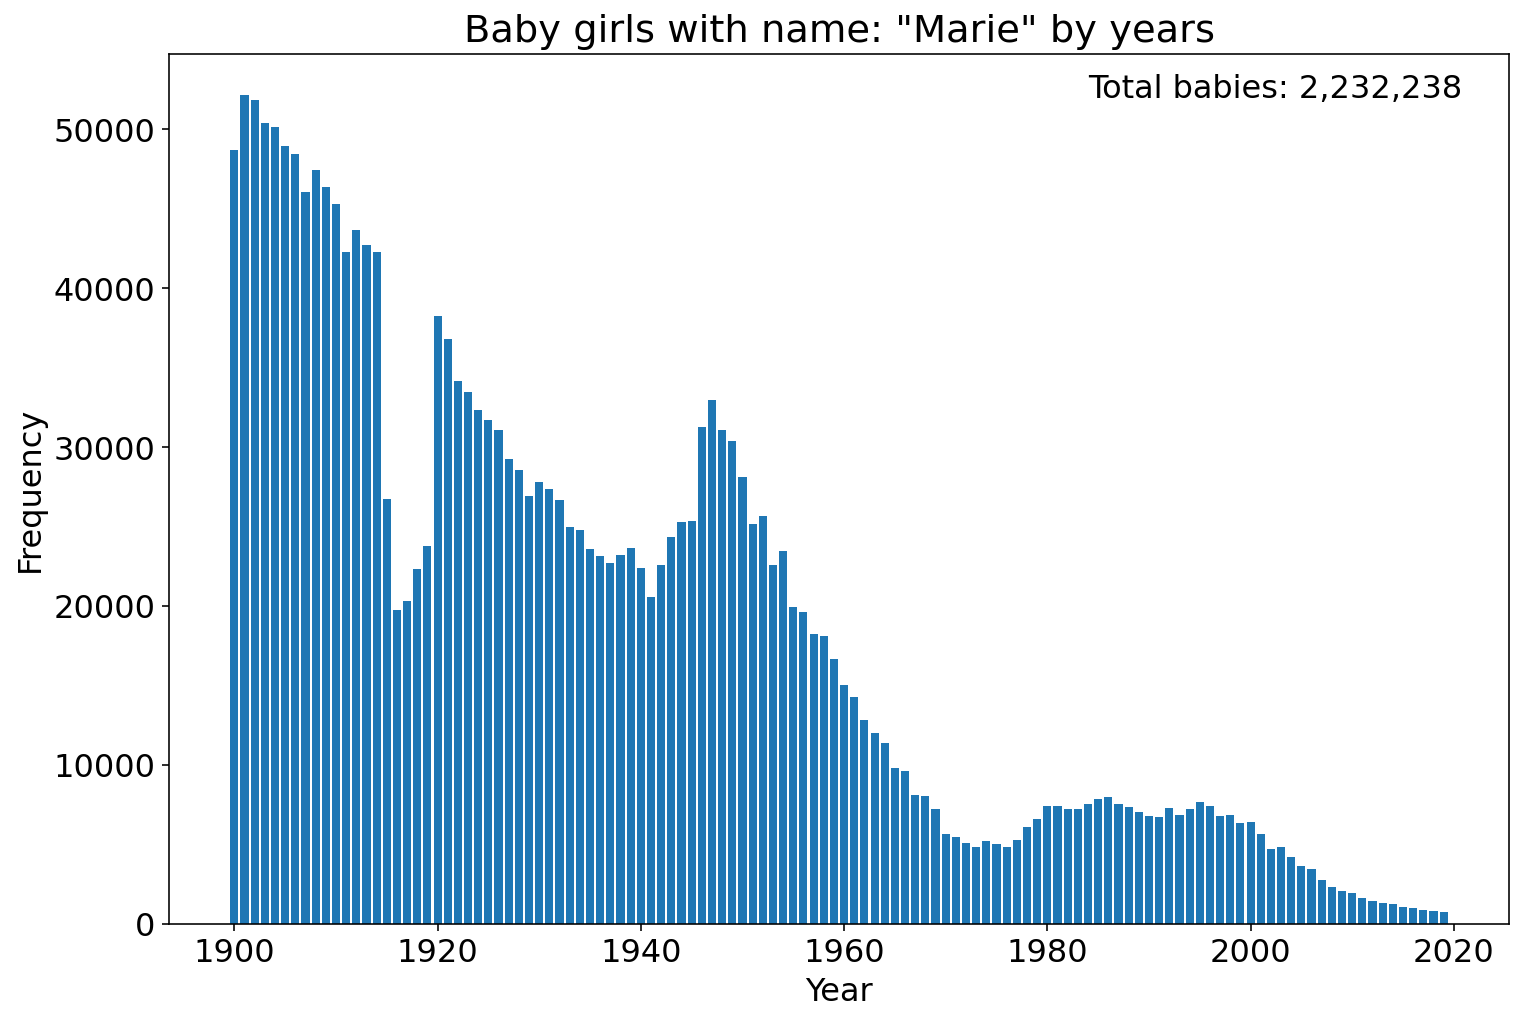

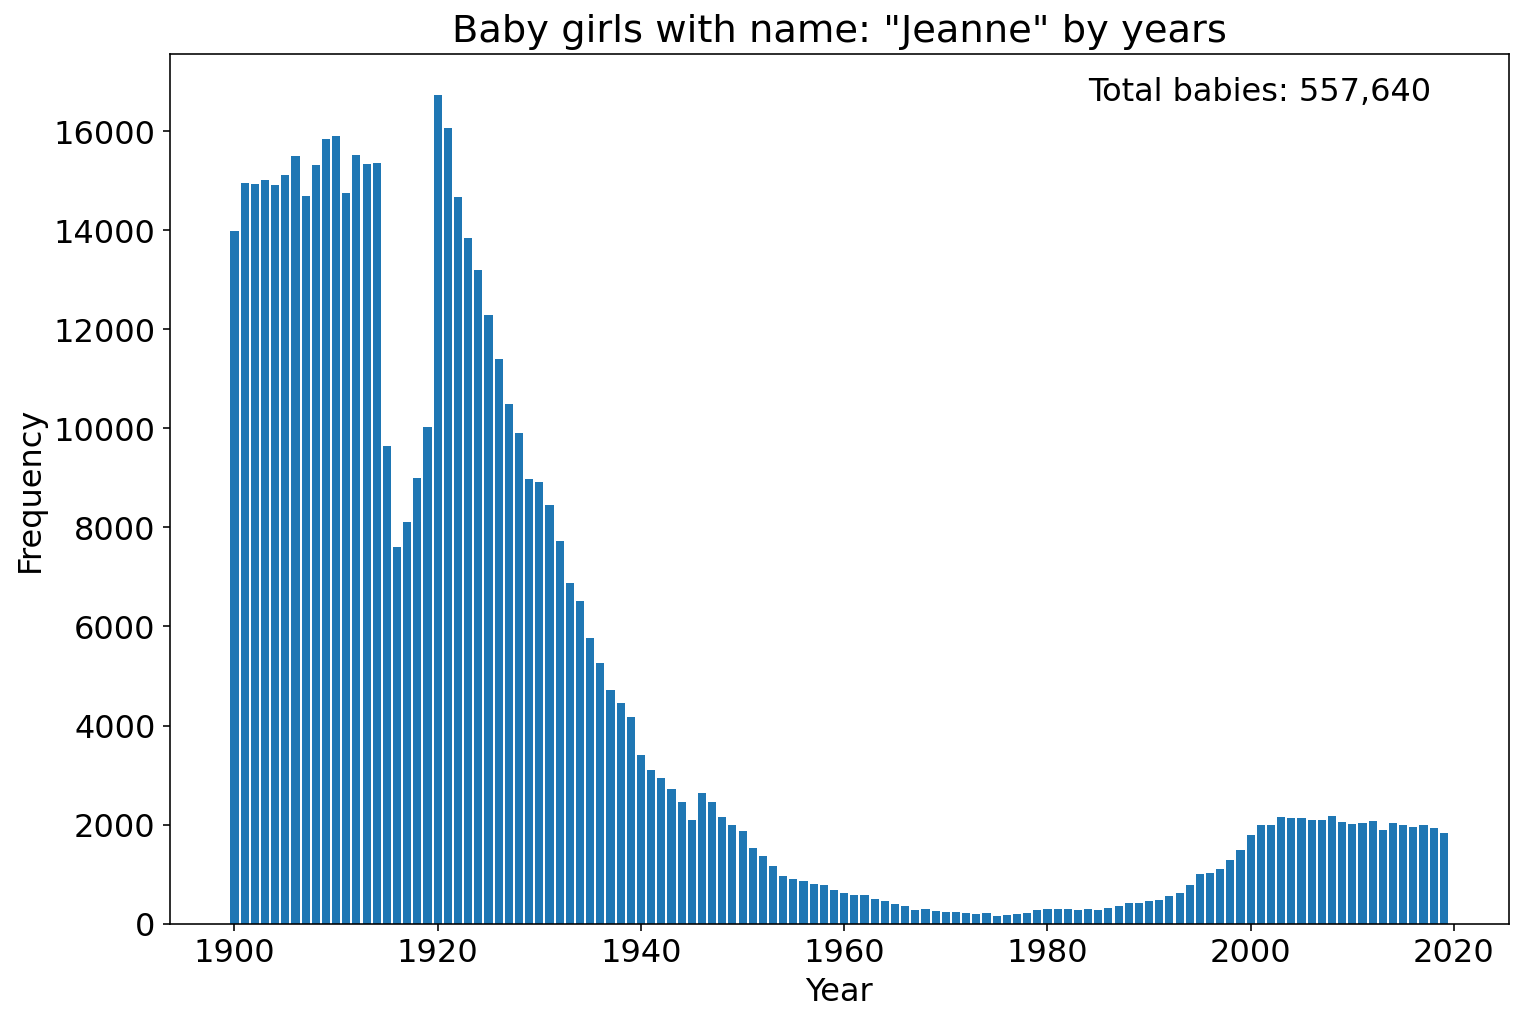

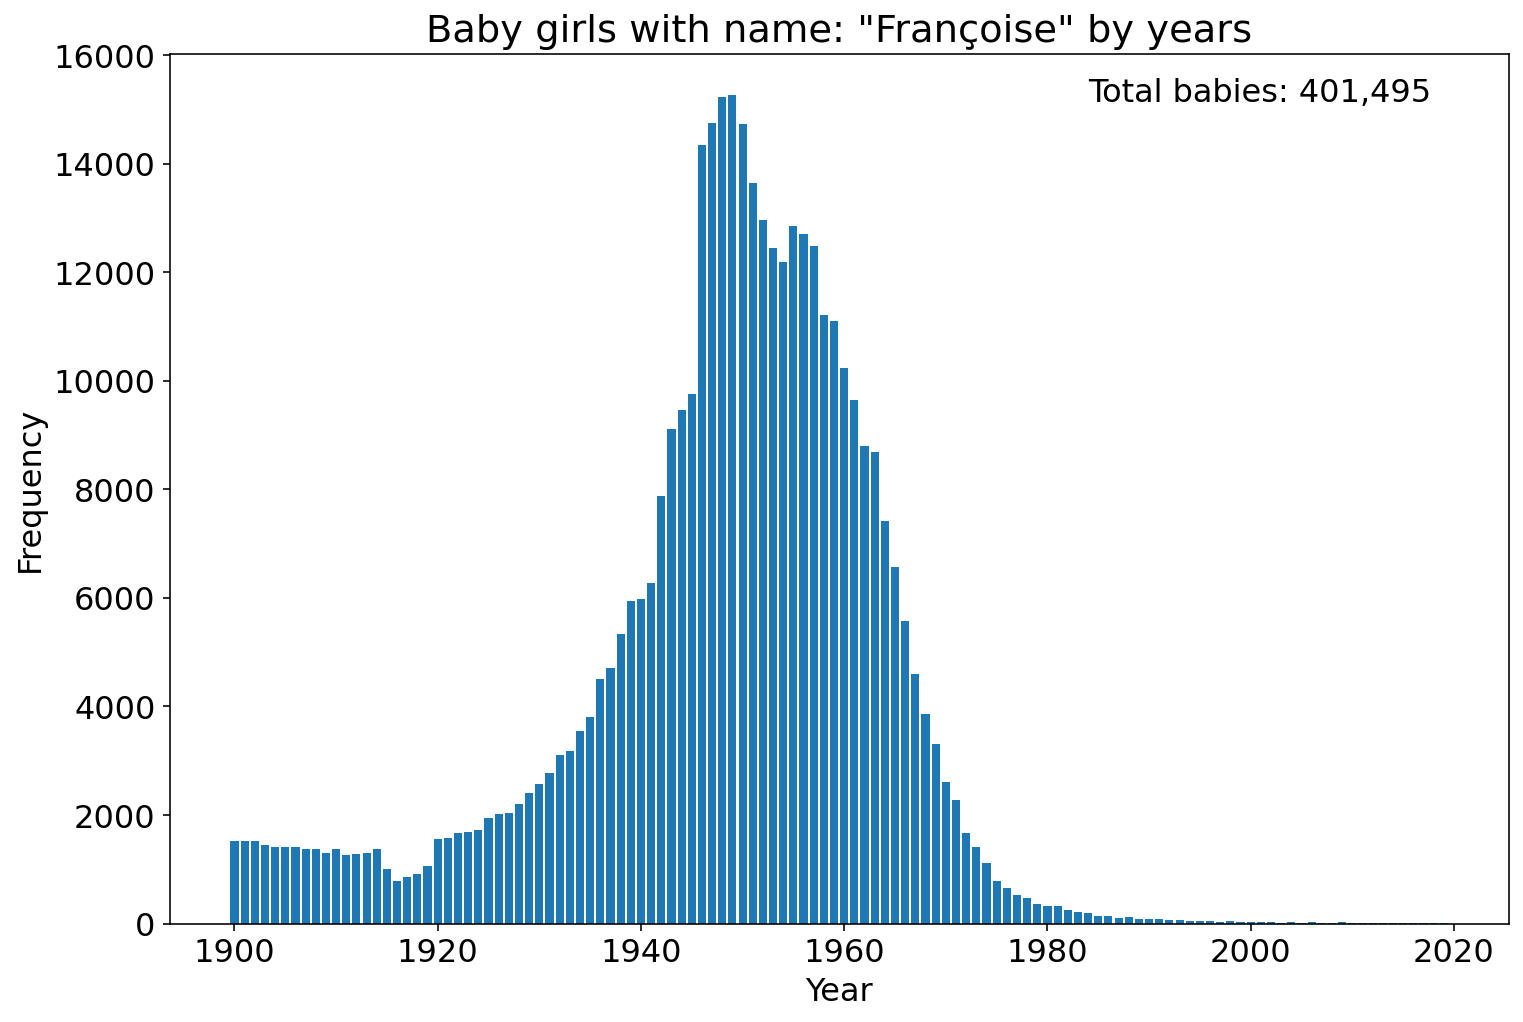

In [26]:
for i in range(len(Ftop_names)-7):
    years=Fdf[(Fdf['name']==Ftop_names[i])].groupby('year')['births'].sum()
    plt.figure(i)
    plt.bar(x=years.index, height=years.values)
    plt.title('Baby girls with name: "' +Ftop_names[i] + '" by years')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.text(max(years.index)-35,max(years.values)-110,'Total babies: {:,}'.format(sum(years.values)))


### What are the most popular names over the years?


In [27]:
Fdf_years=Fdf.groupby(['year','name']).sum()

In [28]:
Fdf_years=Fdf_years.swaplevel()


In [29]:
Fdf_years=Fdf_years.reset_index(level=['name', 'year'])

In [30]:
max_value=max(Fdf_years[Fdf_years['year']==2019]['births'])
max_value

3944

In [31]:
Fdf_years.query('(year == 2019) & (births == @max_value)')['name']

329994    Emma
Name: name, dtype: object

In [32]:
Fdf_years[Fdf_years['year']==2019].sort_values(by="births", ascending=False)[['name','births']][0:3] 

,name,births
329994,Emma,3944
330815,Jade,3820
331880,Louise,3752


In [33]:
name_yearF={}
for year in Fdf_years.year.unique():
    max_value=max(Fdf_years[Fdf_years['year']==year]['births'])
    name_yearF[year]=[Fdf_years.query('(year == @year) & (births == @max_value)')['name'], max_value]
#name_yearF    


In [34]:
name_yearFd={}
for year in Fdf_years.year.unique():
    values=Fdf_years[Fdf_years['year']==year].sort_values(by="births", ascending=False, ignore_index=True)[['name','births']][0:3]
    name_yearFd[year]=values
#name_yearFd  

In [35]:
list_values=[]
for i in range(len(list(name_yearF.values()))):
    list_values.append(list(name_yearF.values())[i][-1])
#list_values    

In [36]:
list_names=[]
for i in range(len(list(name_yearF.values()))):
    list_names.append(list(name_yearF.values())[i][0])

In [37]:
df1=pd.DataFrame(data=name_yearF.values(),columns=['Names','Births'], index=name_yearF.keys())

In [38]:
#df1.Names..rsplit('', 1)

In [39]:
i=0
for string in df1.Names:
    for s in string:
        df1.Names.iloc[i]=s
        i+=1

In [40]:
df1.reset_index(inplace=True)
df1.rename(columns={'index':'Years'}, inplace=True)

<Figure size 1080x864 with 0 Axes>

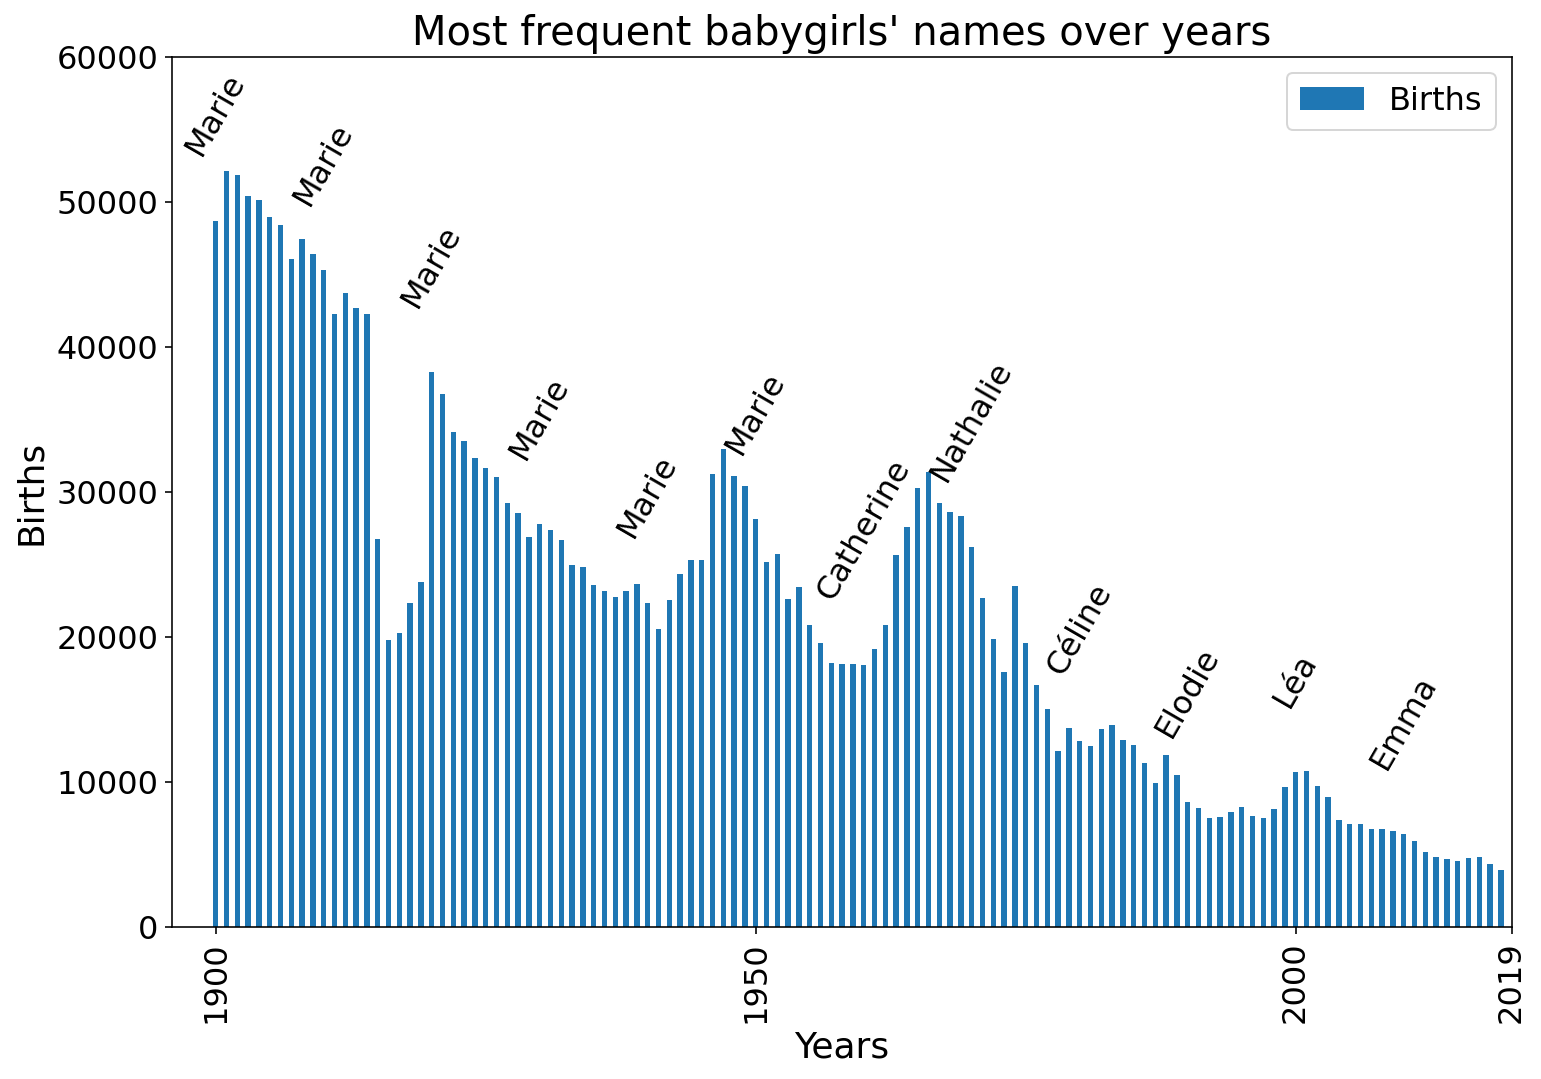

In [41]:
# Plot the figure.
plt.figure(figsize=(15, 12))
ax = df1.plot(x='Years',y='Births',kind='bar');
ax.set_title('Most frequent babygirls\' names over years',size="20")
ax.set_xlabel('Years', size="18")
ax.set_ylabel('Births', size="18")
ax.set_xticks([0,50,100,120])
ax.set_xticklabels(['1900','1950','2000','2019'])
ax.set_ylim([0, 60000])
ax.set_xlim([-4, 120])


rects = ax.patches
def add_value_labels(ax):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    i=0
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height() + 10
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 30
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        #label = "{:.1f}".format(y_value)

        # Create annotation
        if i % 10 ==0:
            ax.annotate(
            
             df1.Names[i],                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
             textcoords="offset points", # Interpret `xytext` as offset in points
             ha='center',                # Horizontally center label
             va=va,
            rotation=60
           )                      # Vertically align label differently for
                                        # positive and negative values.
        i=i+1

# Call the function above. All the magic happens there.
add_value_labels(ax)


<Figure size 1368x1080 with 0 Axes>

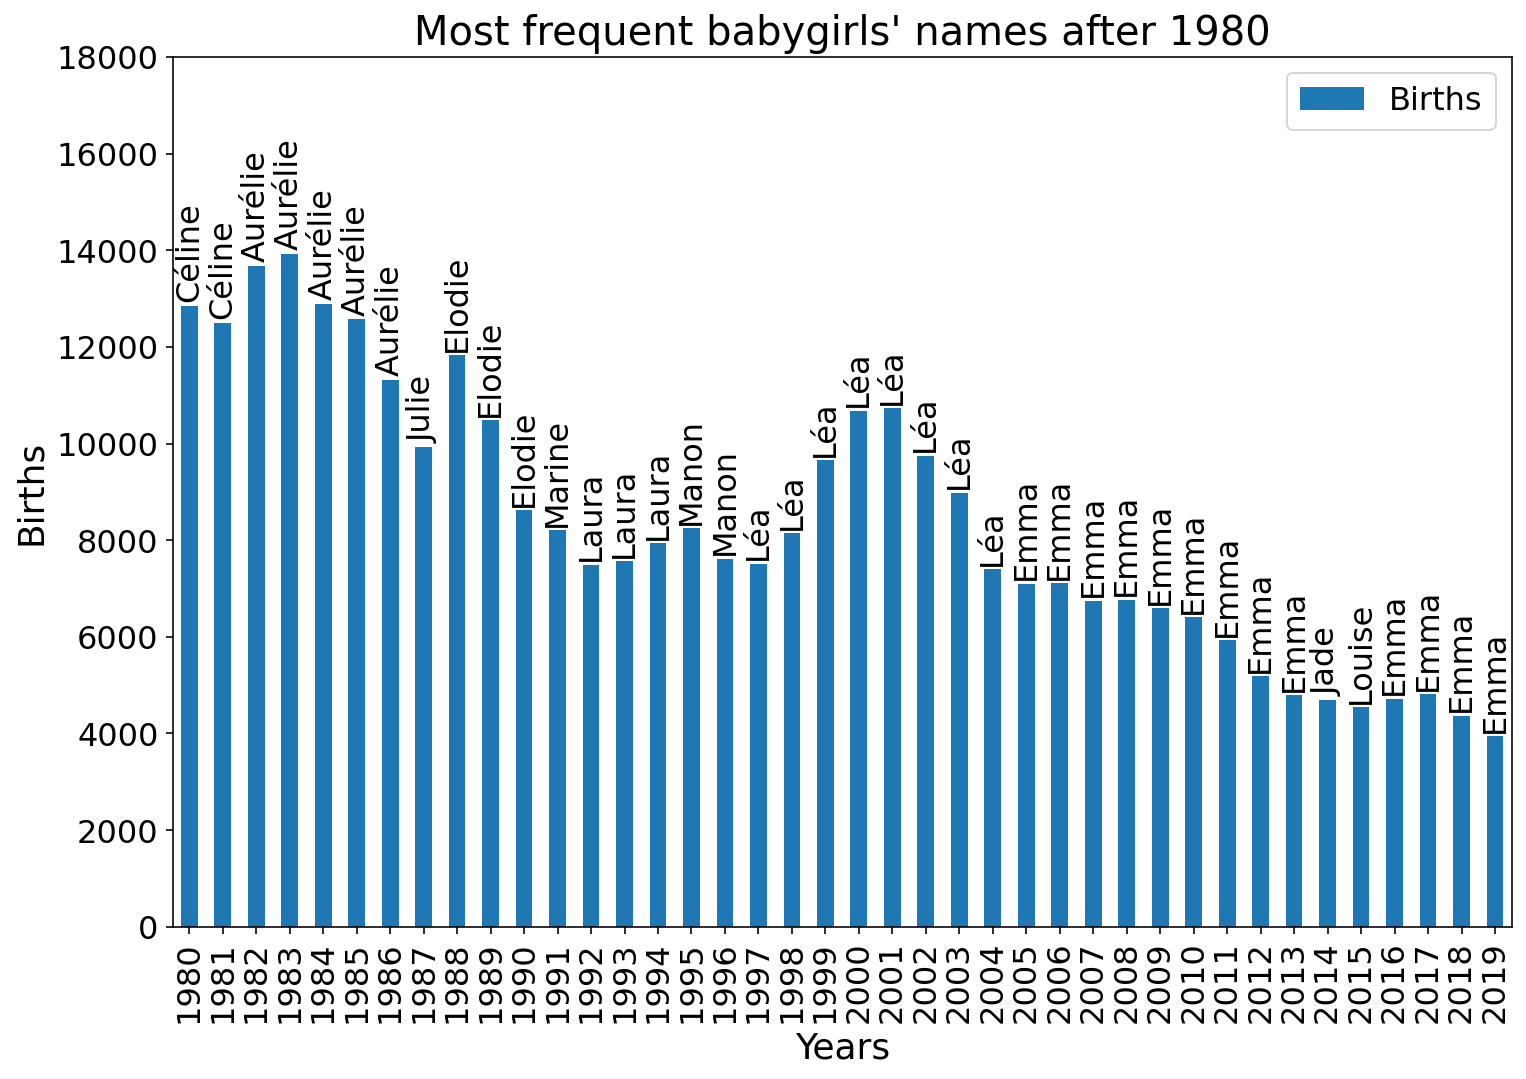

In [42]:
###### Plot the figure.
plt.figure(figsize=(19, 15))
ax = df1.iloc[80:].plot(x='Years',y='Births',kind='bar')
ax.set_title('Most frequent babygirls\' names after 1980',size="20")
ax.set_xlabel('Years', size="18")
ax.set_ylabel('Births', size="18")
ax.set_ylim([0,18000])

#ax.set_xticks([100,105,110,115,120])
#ax.set_xticklabels(['2000','2005','2010','2015','2019'])

rects = ax.patches
def add_value_labels(ax):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    i=0
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 2
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        #label = "{:.1f}".format(y_value)

        # Create annotation
        if i % 1 ==0:
            ax.annotate(
            
             df1.Names[i+80],                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
             textcoords="offset points", # Interpret `xytext` as offset in points
             ha='center',                # Horizontally center label
             va=va,
            rotation=90
           )                      # Vertically align label differently for
                                        # positive and negative values.
        i=i+1

# Call the function above. All the magic happens there.
add_value_labels(ax)



From above plots we can check all names except Marie, Emma, Lea when they peaked just in the short term. Marie was the most popular in the period 1900-1960 and Emma is most popular in 2005-2019.

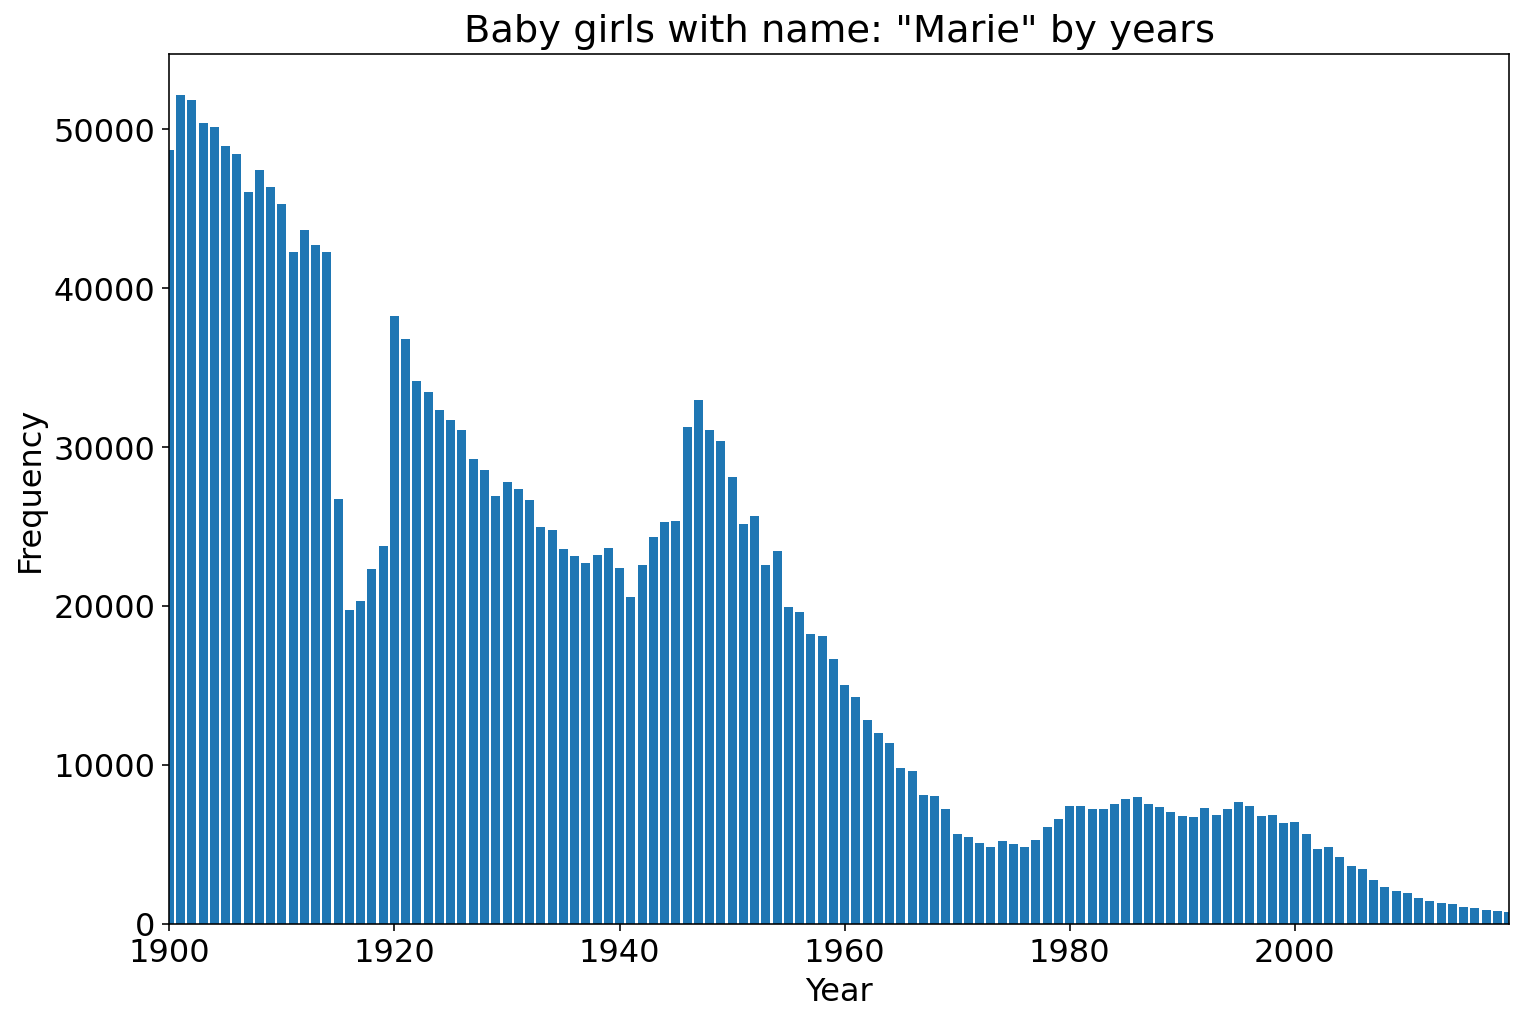

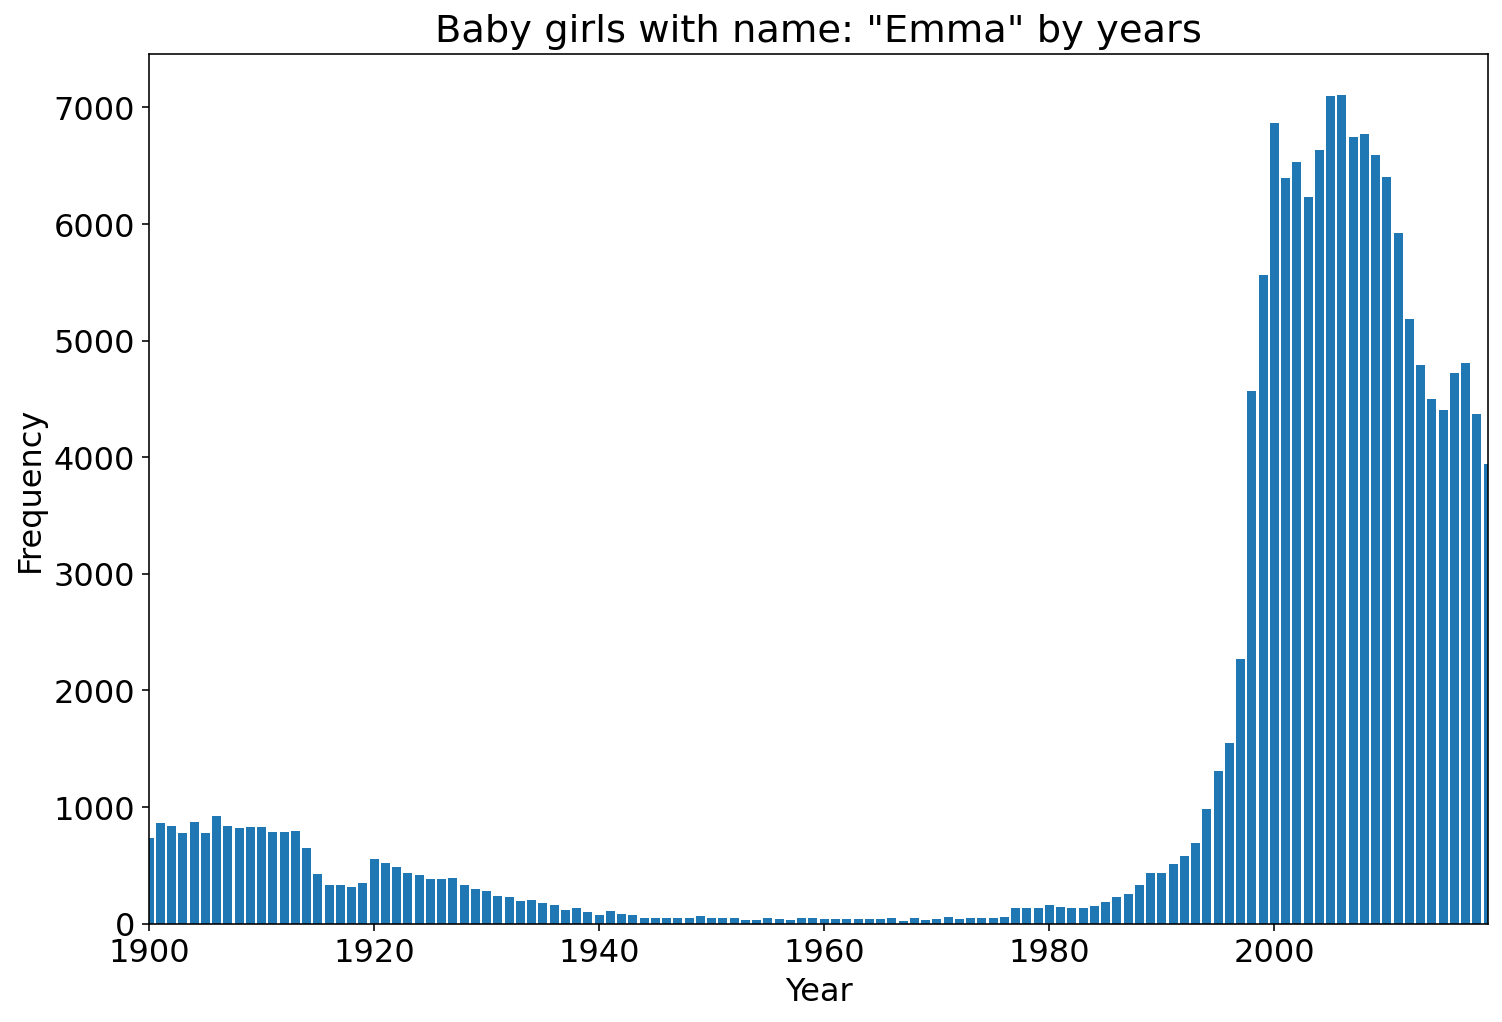

In [45]:
names=['Marie','Emma']
for i in range(len(names)):
    years=Fdf[(Fdf['name']==names[i])].groupby('year')['births'].sum()
    plt.figure(i)
    plt.bar(x=years.index, height=years.values)
    plt.title('Baby girls with name: "' +names[i] + '" by years')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.xlim([1900, 2019])

### What names are commonly used by both sexes?

In [46]:
len(df[df['sex']=="F"]['name'].unique())

18765

In [47]:
len(df[df['sex']=="M"]['name'].unique())

15672

In [48]:
Unidf = pd.merge(Fdf, Mdf, how ='inner', on =['name'])


In [49]:
Unidf

,year_x,name,births_x,year_y,births_y
0,1998,Aaron,3,1907,3
1,1998,Aaron,3,1911,3
2,1998,Aaron,3,1931,3
3,1998,Aaron,3,1935,3
4,1998,Aaron,3,1949,3
...,...,...,...,...,...
1884788,2019,Zola,62,2015,12
1884789,2019,Zola,62,2016,5
1884790,2019,Zola,62,2017,6
1884791,2019,Zola,62,2018,8


In [50]:
len(Unidf.name.unique())

2021

In [51]:
names_births=df.groupby('name')['births'].sum()
sort_names_births=sorted(names_births.items(), reverse=True, key=lambda k:k[1])
sort_names_births[0:10]

[('Marie', 2259130),
 ('Jean', 1915065),
 ('Pierre', 892136),
 ('Michel', 820430),
 ('André', 712451),
 ('Jeanne', 557682),
 ('Philippe', 538678),
 ('Louis', 521542),
 ('René', 516596),
 ('Alain', 506911)]

In [52]:
uni_names=[]
for name in sort_names_births[0:30]:
    if (name[0] in list(Unidf.name.unique())):
           uni_names.append(name[0])

In [53]:
Fnames_births.index

Index(['Aalia', 'Aaliya', 'Aaliyah', 'Aalya', 'Aalyah', 'Aanor', 'Aaricia',
       'Aaron', 'Aaya', 'Abassia',
       ...
       'Évangéline', 'Éve', 'Éveline', 'Évelyne', 'Évie', 'Évy', 'Éya',
       'Ïnaya', 'Özge', 'Özlem'],
      dtype='object', name='name', length=18764)

In [54]:
uninames_births={}
for name in uni_names:
    if ((name in Fnames_births.index) & (name in Mnames_births.index)):
        print('{:<12}{:<12,}{:<12,}'.format(name, Fnames_births[name],Mnames_births[name]))
        uninames_births[name]=[Fnames_births[name],Mnames_births[name]]

Marie       2,232,238   26,892      
Jean        512         1,914,553   
Pierre      893         891,243     
Michel      135         820,295     
André       606         711,845     
Jeanne      557,640     42          
Philippe    257         538,421     
Louis       113         521,429     
René        378         516,218     
Alain       13          506,898     
Jacques     100         482,714     
Bernard     45          469,255     
Claude      56,653      411,727     
Marcel      37          468,115     
Daniel      124         435,281     
Roger       156         423,578     
Robert      103         419,098     
Paul        116         419,006     
Dominique   168,025     241,915     
Christian   68          405,483     
Henri       137         405,331     
Georges     599         404,646     
Nicolas     235         404,782     
Françoise   401,495     9           
Monique     399,772     419         
François    219         398,450     
Patrick     3           395,068     
C

In [55]:
uninames_births

{'Marie': [2232238, 26892],
 'Jean': [512, 1914553],
 'Pierre': [893, 891243],
 'Michel': [135, 820295],
 'André': [606, 711845],
 'Jeanne': [557640, 42],
 'Philippe': [257, 538421],
 'Louis': [113, 521429],
 'René': [378, 516218],
 'Alain': [13, 506898],
 'Jacques': [100, 482714],
 'Bernard': [45, 469255],
 'Claude': [56653, 411727],
 'Marcel': [37, 468115],
 'Daniel': [124, 435281],
 'Roger': [156, 423578],
 'Robert': [103, 419098],
 'Paul': [116, 419006],
 'Dominique': [168025, 241915],
 'Christian': [68, 405483],
 'Henri': [137, 405331],
 'Georges': [599, 404646],
 'Nicolas': [235, 404782],
 'Françoise': [401495, 9],
 'Monique': [399772, 419],
 'François': [219, 398450],
 'Patrick': [3, 395068],
 'Catherine': [394662, 170],
 'Nathalie': [382887, 75],
 'Gérard': [239, 379384]}

In [56]:
df_uni=pd.DataFrame(data=uninames_births).T

In [57]:
df_uni.columns=['birthsF','birthsM']

In [58]:
df_uni.reset_index(inplace=True)
df_uni

df_uni.rename(columns={'index':'name'}, inplace=True)

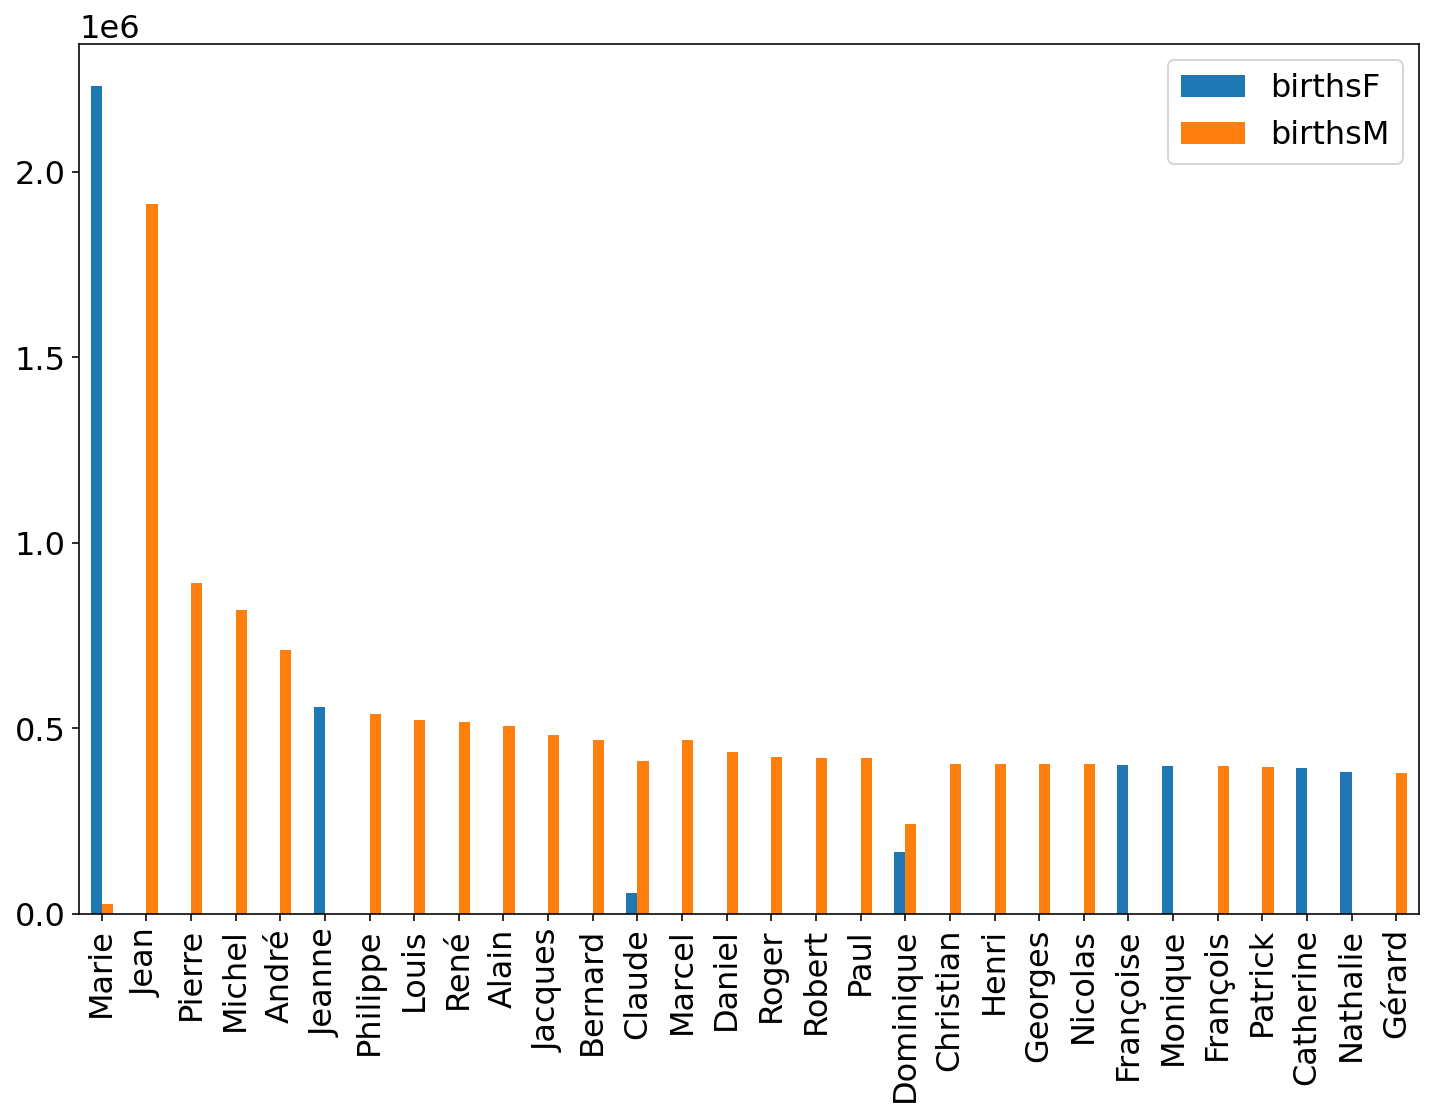

In [59]:
ax=df_uni.plot(kind="bar");
ax.set_xticks(range(0,30))
ax.set_xticklabels(df_uni.name);

From the above plt we can see that name 'Dominique' has approximately the same representation for boys and girls.

### Have names gotten shorter or longer over time?

In [60]:
Fdf_years[Fdf_years['year']>2000].sort_values(by="births", ascending=False)[['year','name','births']][0:20] 

,year,name,births
211662,2001,Léa,10727
216894,2002,Léa,9749
222355,2003,Léa,8985
211879,2001,Manon,7592
217117,2002,Manon,7580
228122,2004,Léa,7397
238414,2006,Emma,7104
232255,2005,Emma,7099
209618,2001,Chloé,7040
222599,2003,Manon,6921


In [61]:
df1=pd.DataFrame(data=name_yearF.values(),columns=['Names','Births'], index=name_yearF.keys())

In [62]:
df_years=df.groupby(['year','name']).sum()

In [63]:
df_years=df_years.swaplevel()
df_years
df_years=df_years.reset_index(level=['name', 'year'])

In [64]:
df_years.groupby('year').count()

,name,births
year,,
1900,1594,1594
1901,1611,1611
1902,1621,1621
1903,1646,1646
1904,1673,1673
...,...,...
2015,13185,13185
2016,13077,13077
2017,13012,13012


In [65]:
length_names={}

for year in years.index:
    names=df_years.groupby('year').get_group(year)['name'].astype(str)
    length_name=[]
    for item in names:
        length_name.append(len(item))  
    length_names[year]=np.mean(length_name)    
        
#np.mean(length_names)

In [66]:
length_names.keys();

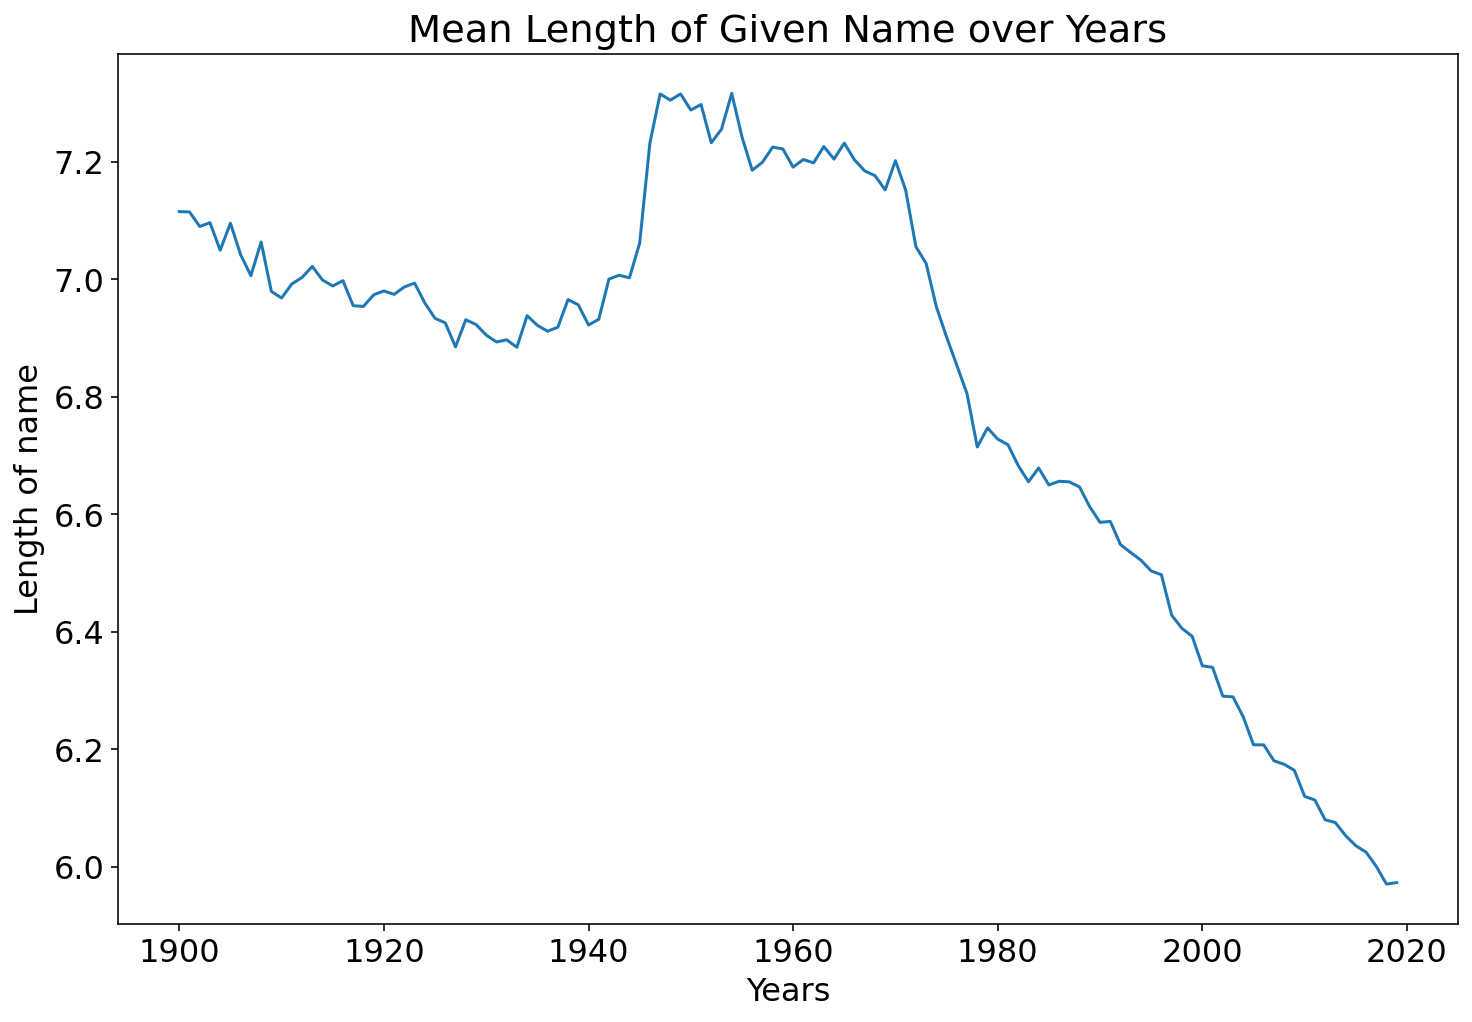

In [67]:
plt.plot(length_names.keys(),length_names.values());
plt.xlabel('Years')
plt.ylabel('Length of name');
plt.title('Mean Length of Given Name over Years');


### What names are trendy and peak for a short duration?


In [68]:
name_yearFd={}
for year in Fdf_years.year.unique():
    values=Fdf_years[Fdf_years['year']==year].sort_values(by="births", ascending=False, ignore_index=True)[['name','births']][0:5]
    name_yearFd[year]=values
#name_yearFd  

In [69]:
#name_yearFd

In [70]:
data={}
for year in name_yearFd.keys():
    data[year]={'name_1':name_yearFd[year]['name'][0],'name_2':name_yearFd[year]['name'][1],
          'name_3':name_yearFd[year]['name'][2],'name_4':name_yearFd[year]['name'][3],'name_5':name_yearFd[year]['name'][4]}

In [71]:
#data.keys()

In [72]:
df_mostF=pd.DataFrame(data=data)
df_mostF=df_mostF.T

In [73]:
df_mostF[:].value_counts().sort_values()[:30]

name_1     name_2     name_3      name_4    name_5    
Nathalie   Sandrine   Isabelle    Valérie   Christelle    1
Catherine  Sylvie     Christine   Marie     Brigitte      1
Céline     Aurélie    Emilie      Virginie  Stéphanie     1
           Emilie     Aurélie     Virginie  Stéphanie     1
           Stéphanie  Virginie    Aurélie   Sandrine      1
                                  Sandrine  Laetitia      1
Elodie     Laura      Julie       Aurélie   Marie         1
                                            Marion        1
                                  Marine    Marie         1
Brigitte   Catherine  Marie       Sylvie    Martine       1
Emma       Jade       Louise      Alice     Chloé         1
                      Léa         Chloé     Manon         1
           Louise     Chloé       Jade      Manon         1
                      Manon       Chloé     Jade          1
Marie      Jeanne     Madeleine   Marcelle  Suzanne       1
                                  Suzanne   D

In [74]:
#import re
counter=0
for col in df_mostF.columns:
    counter=counter+ df_mostF[df_mostF[col]=='Emma'].count()[0]
counter    


20

In [75]:
df_mostF.name_1.unique()

array(['Marie', 'Martine', 'Brigitte', 'Catherine', 'Sylvie', 'Nathalie',
       'Sandrine', 'Stéphanie', 'Céline', 'Aurélie', 'Julie', 'Elodie',
       'Marine', 'Laura', 'Manon', 'Léa', 'Emma', 'Jade', 'Louise'],
      dtype=object)

In [76]:
df_mostF.name_3.unique()

array(['Marguerite', 'Madeleine', 'Jacqueline', 'Jeanne', 'Jeannine',
       'Monique', 'Nicole', 'Françoise', 'Chantal', 'Catherine',
       'Brigitte', 'Martine', 'Marie', 'Christine', 'Isabelle', 'Sylvie',
       'Sandrine', 'Nathalie', 'Céline', 'Virginie', 'Aurélie', 'Emilie',
       'Julie', 'Elodie', 'Laura', 'Camille', 'Chloé', 'Emma', 'Manon',
       'Clara', 'Jade', 'Léa', 'Lola', 'Louise'], dtype=object)

In [77]:
names=['Sylvie','Nathalie','Elodie','Aurélie','Stéphanie','Suzanne','Sandrine']
counters=[]
for name in names:
    counter=0
    for year in name_yearFd.keys():
        for i in range(5):
            if name_yearFd[year]['name'][i]== name:
                counter+=1
    counters.append(counter)   
counters    

[13, 14, 10, 11, 11, 8, 12]

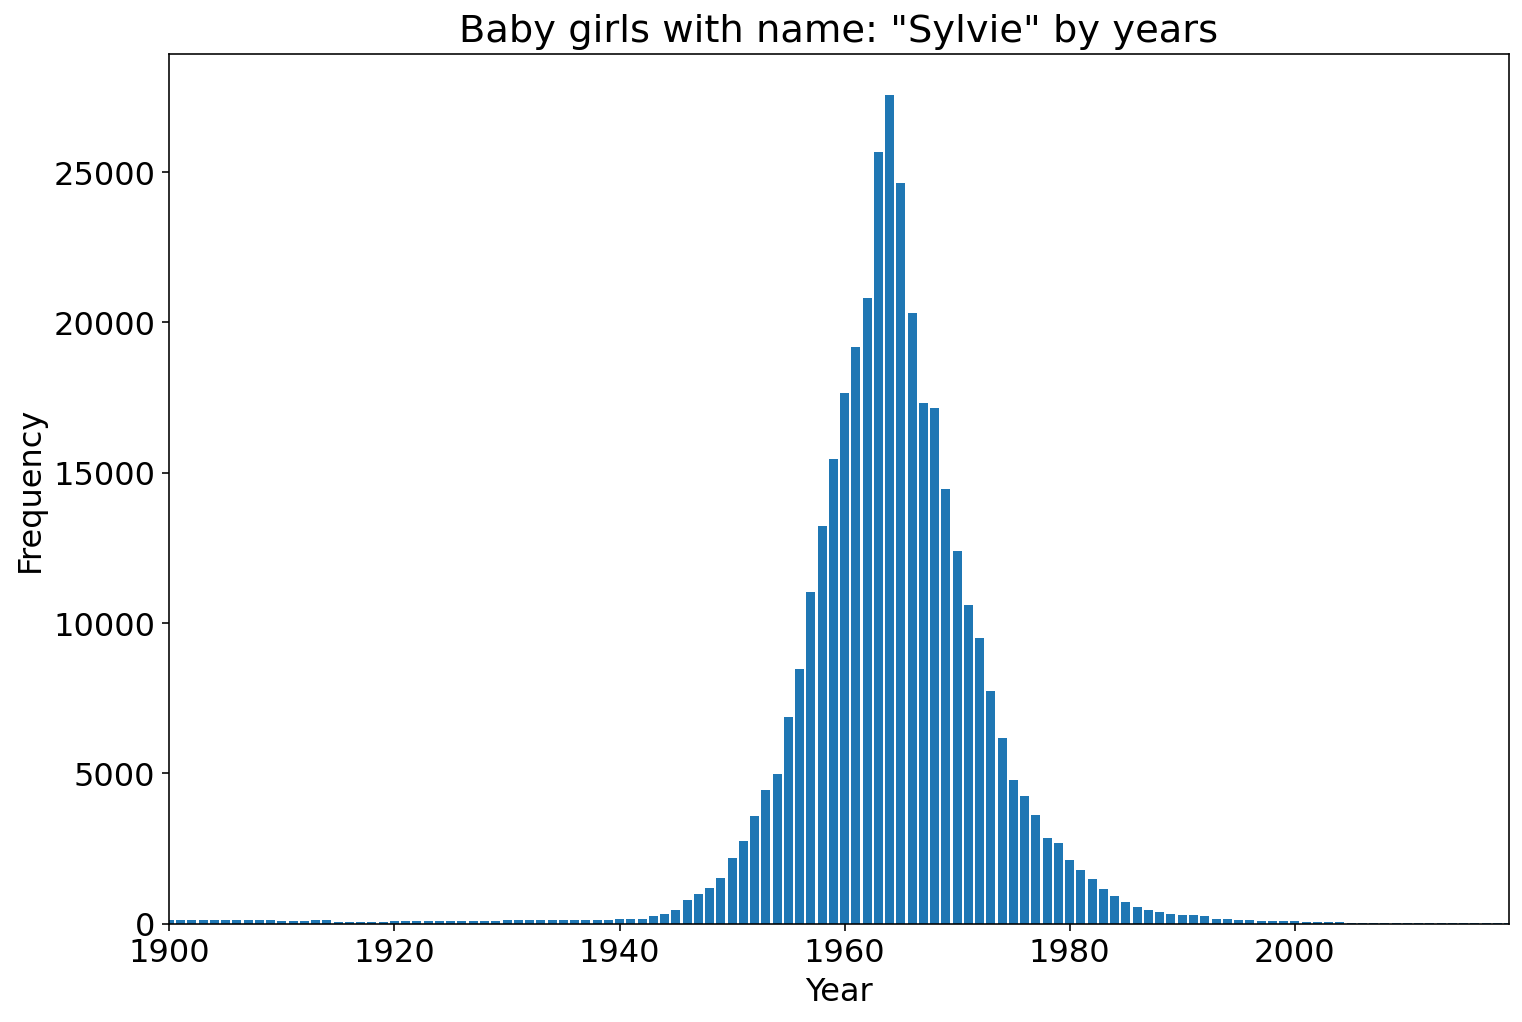

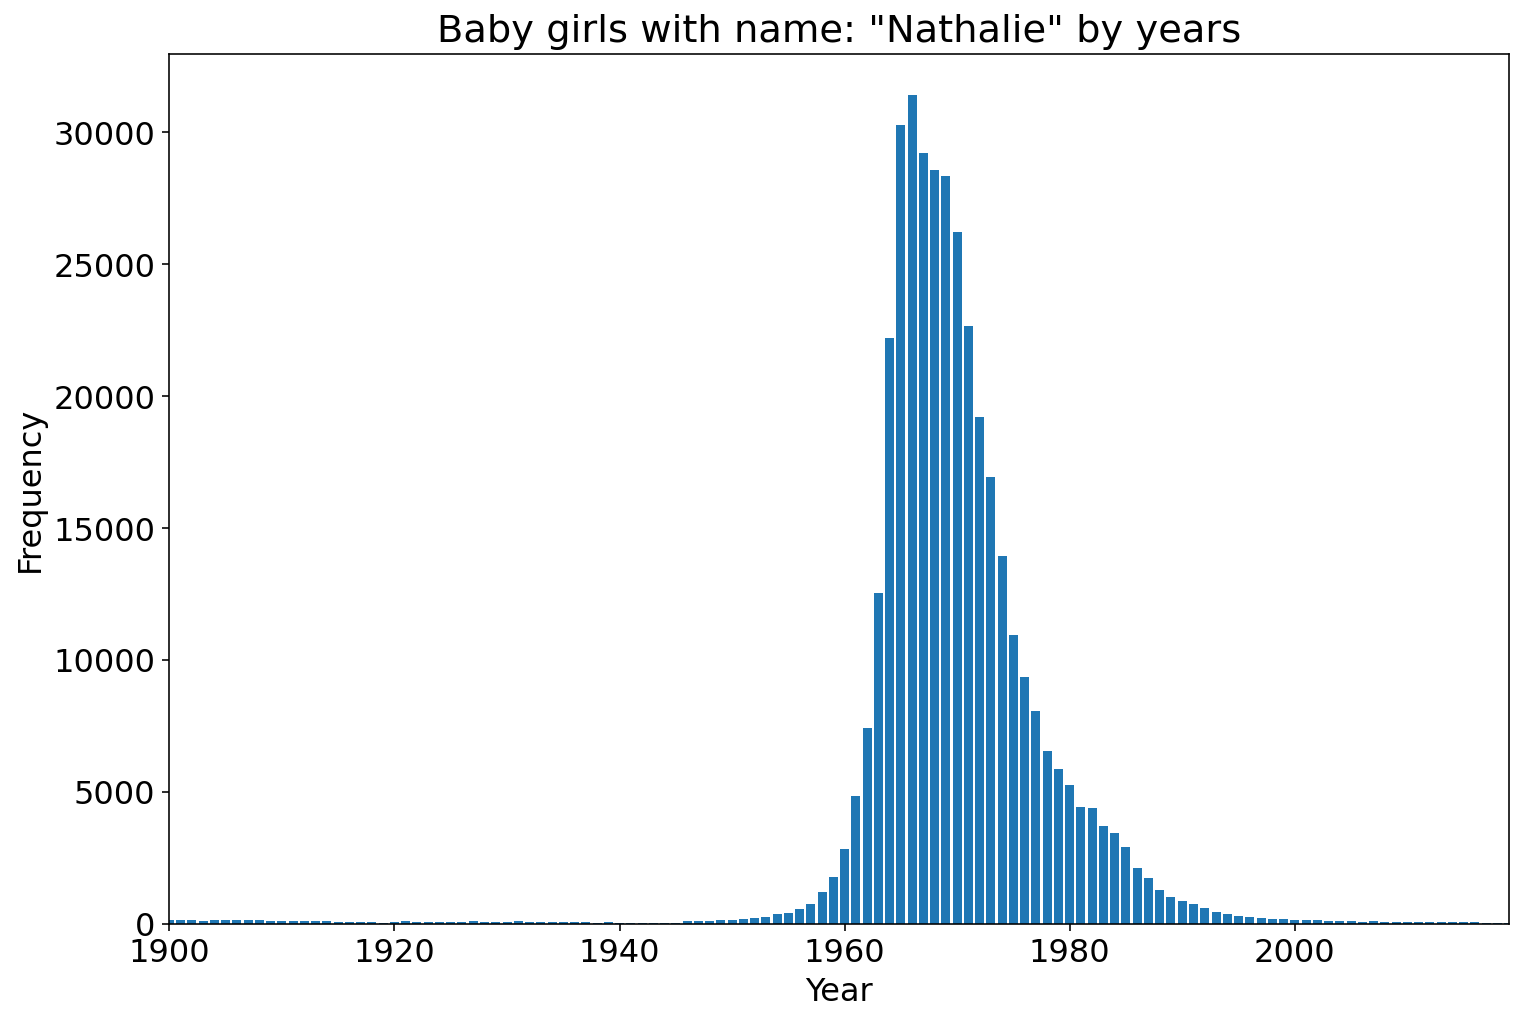

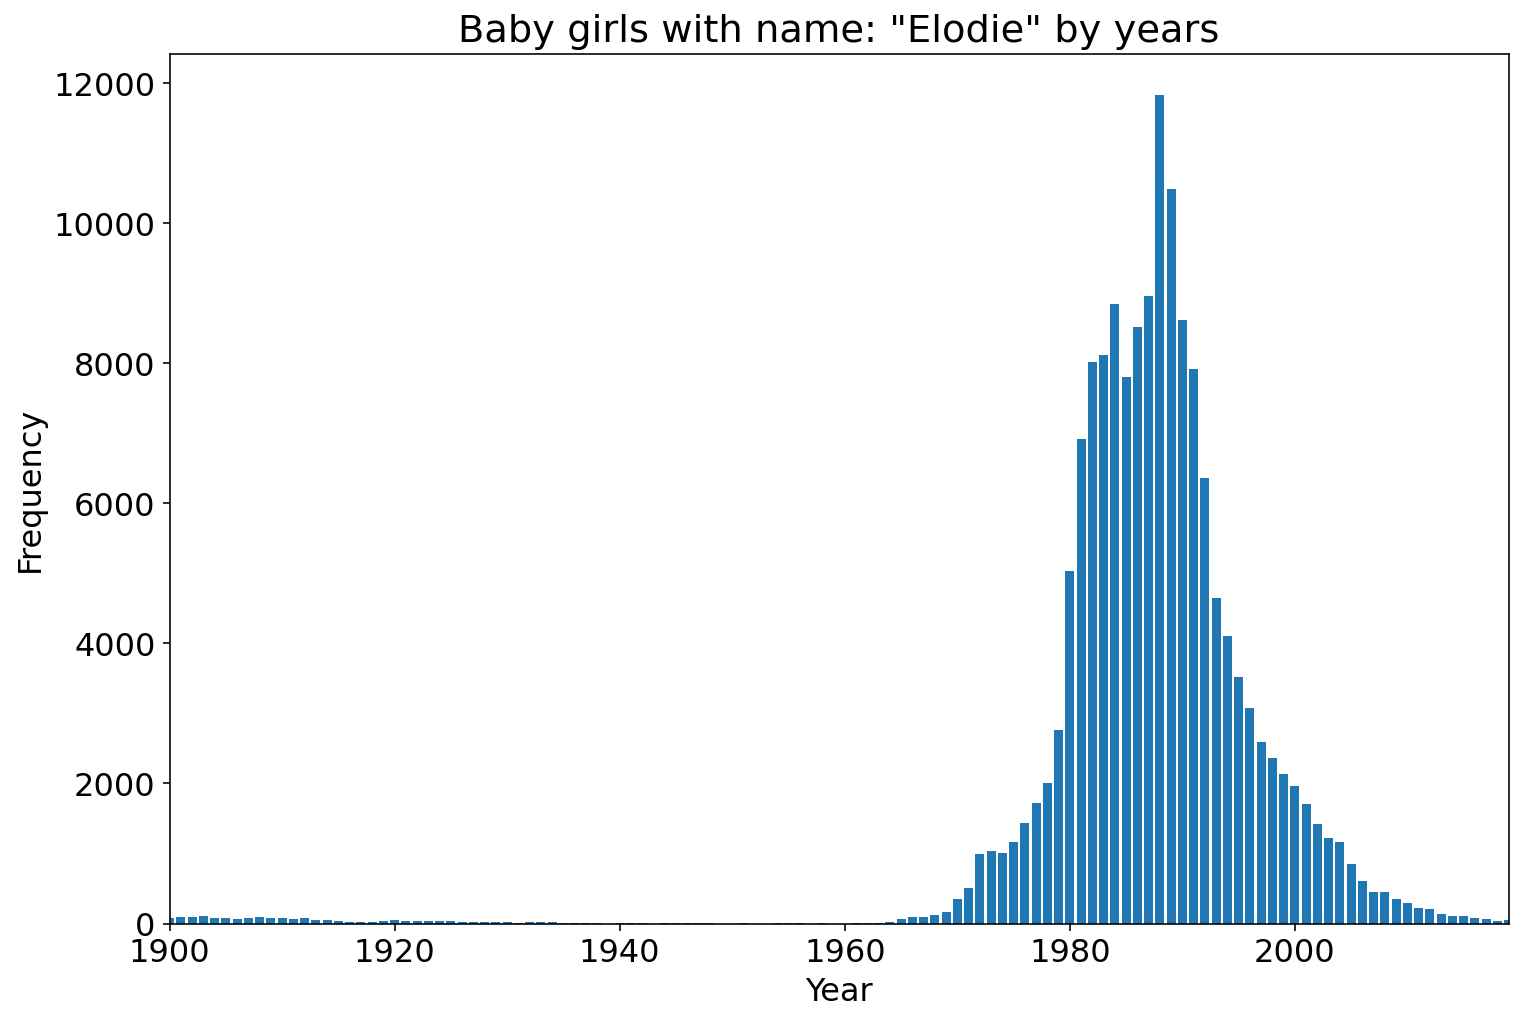

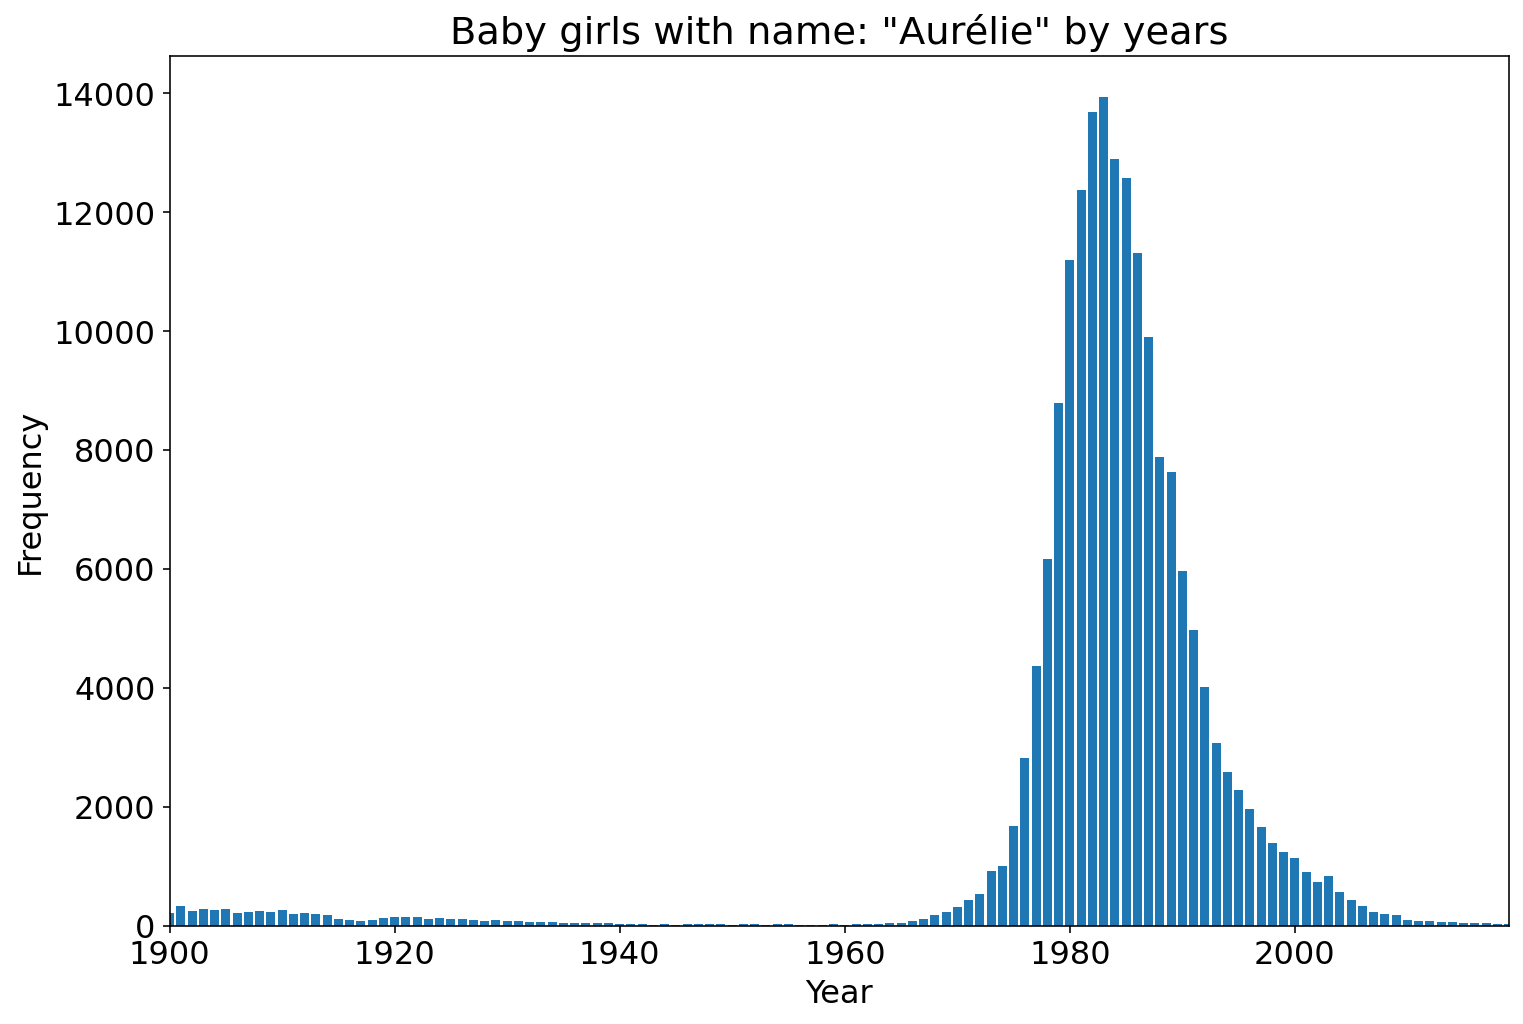

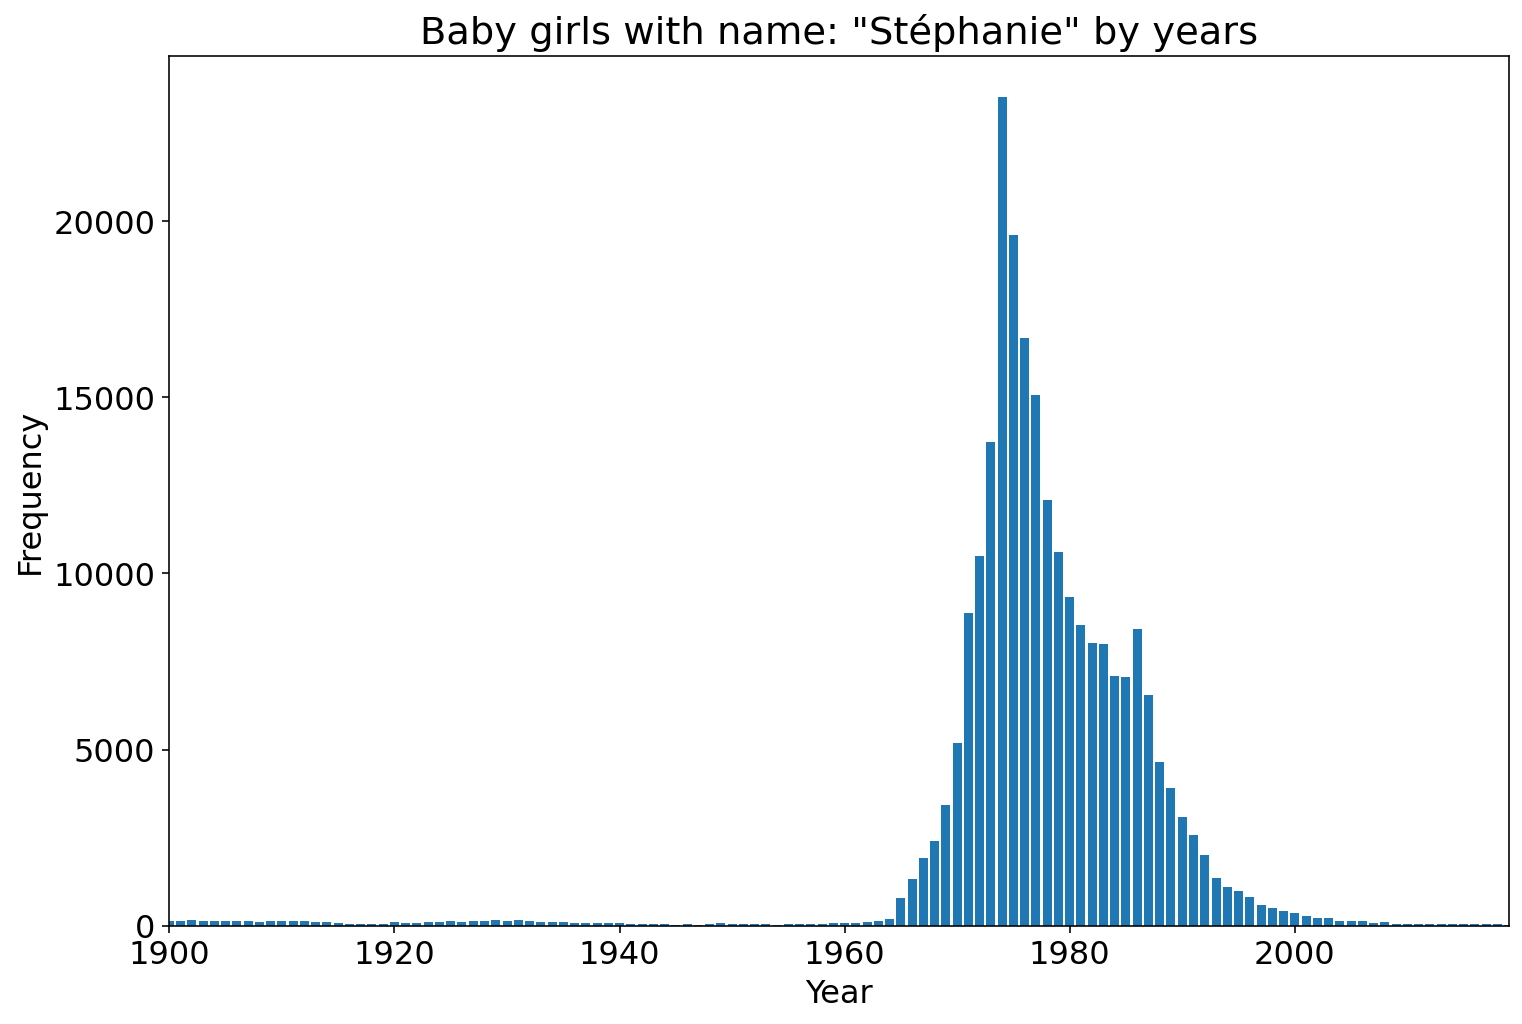

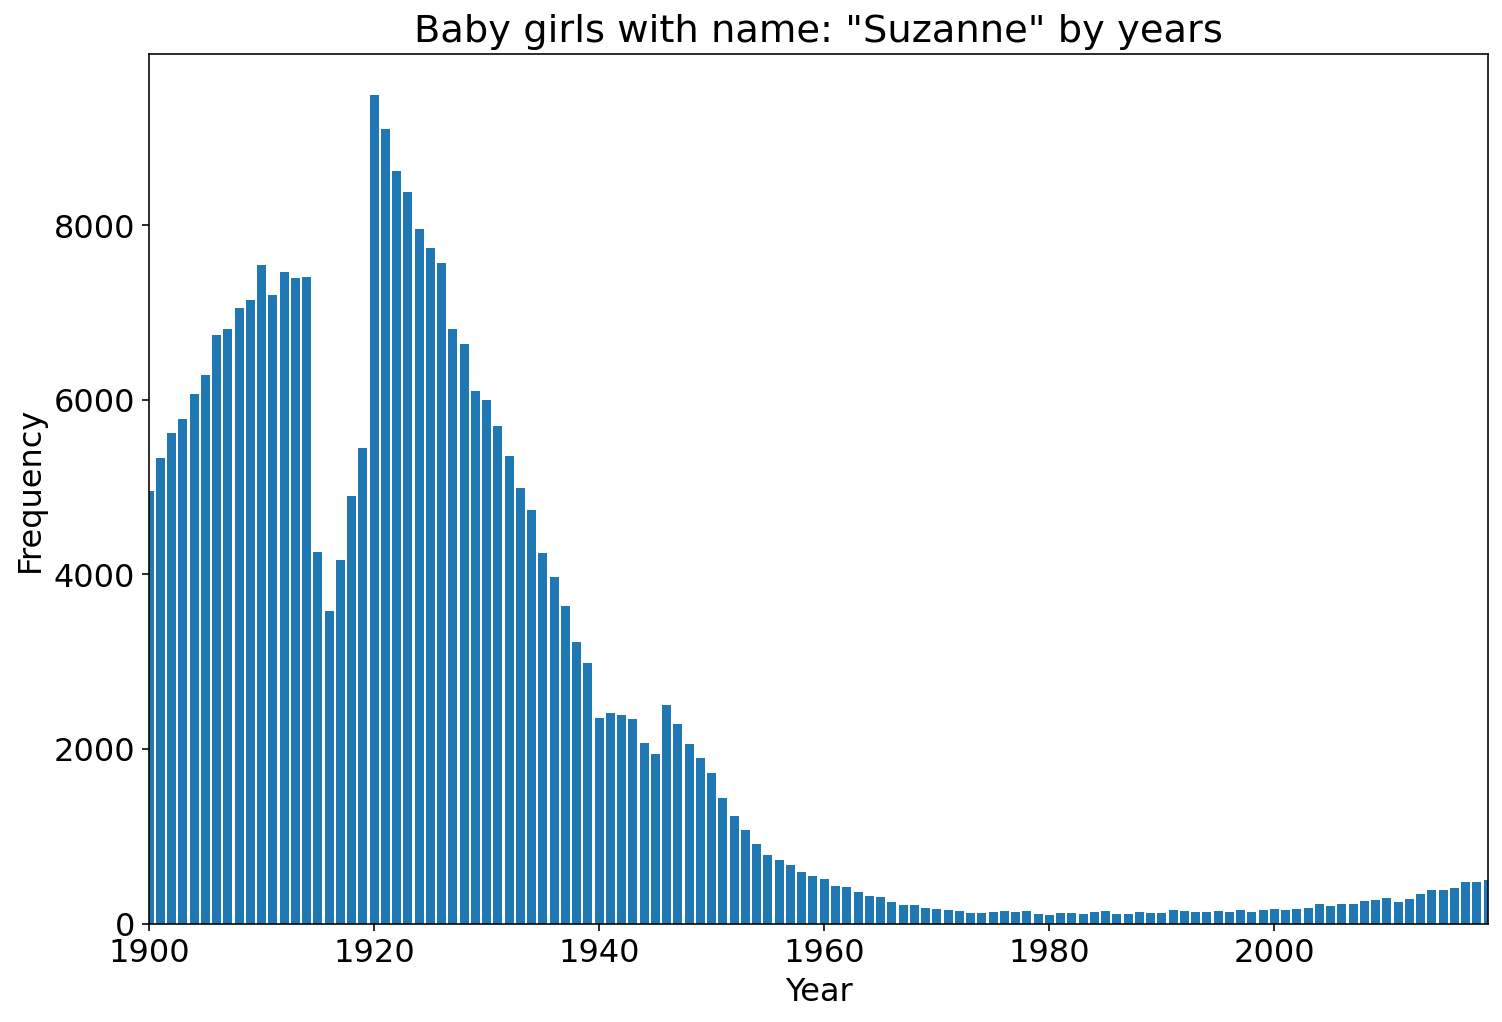

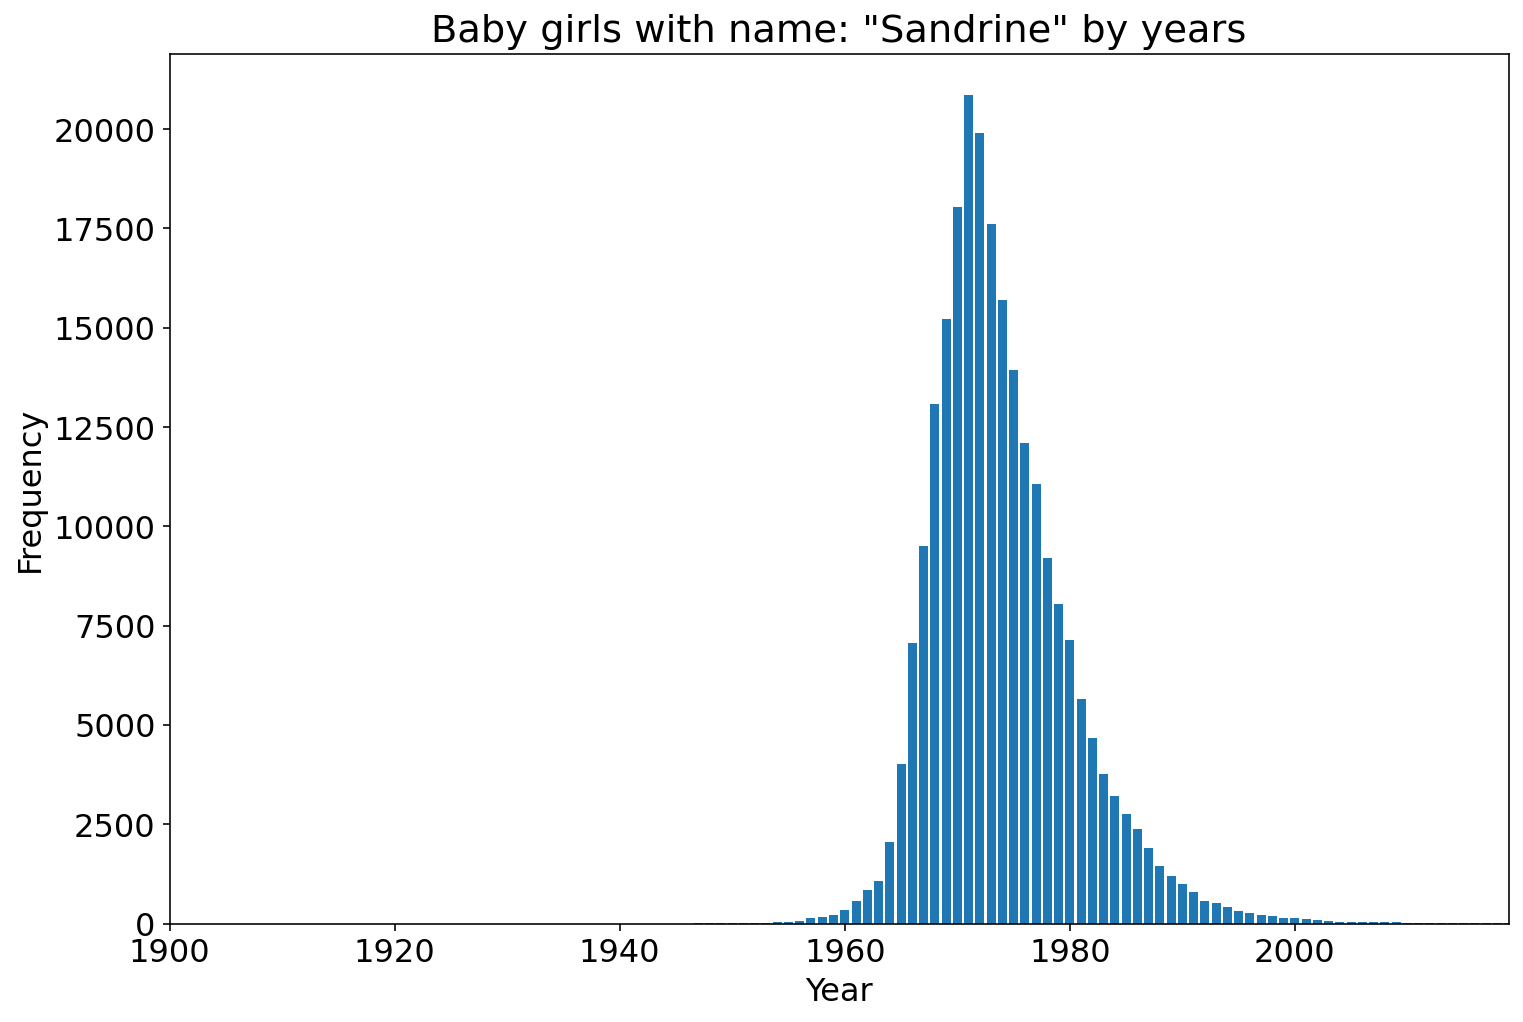

In [78]:
for i in range(len(names)):
    years=Fdf[(Fdf['name']==names[i])].groupby('year')['births'].sum()
    plt.figure(i)
    plt.bar(x=years.index, height=years.values)
    plt.title('Baby girls with name: "' +names[i] + '" by years')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.xlim([1900, 2019])

We can identify girl names Sylvie, Nathalie, Aurelie, Sandrine, which are trendy only for a short period.

## Acknowledgements

The data was downloaded from [INSEE](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip) and processed to remove missing data. The columns were renamed from french to english. See `download.py` for more details. 